In [1]:
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib as plt
import seaborn as sns
import cv2
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from skin_cancer_detection.hairremoval import hair_removal

## Loading Data & Data Prep

In [2]:
skin_df = pd.read_csv('../raw_data/HAM10000_metadata.csv')
skin_df

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear
...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face


In [3]:
skin_df['path'] = [f'../raw_data/HAM10000_all/{img}.jpg' for img in skin_df['image_id']]

In [4]:
#OPTION 1 for loading images
#sizes: (100,75), 
skin_df['image_resized'] = skin_df['path'].map(lambda x: np.asarray(Image.open(x).resize((244,244))))

In [5]:
#OPTION 2 hair removal loading images

#features_list=[]
#for index,row in skin_df.iterrows():
#    path = row['path']
#    image = cv2.imread(path)
#    final_image = hair_removal(image)
#    image_resize = cv2.resize(final_image,(100,75))
#    final_image = cv2.cvtColor(final_image, cv2.COLOR_BGR2RGB)
#    features_list.append(final_image)

#skin_df['images_resized'] = features_list

In [6]:
skin_df

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,image_resized
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,../raw_data/HAM10000_all/ISIC_0027419.jpg,"[[[187, 149, 192], [189, 152, 194], [191, 155,..."
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,../raw_data/HAM10000_all/ISIC_0025030.jpg,"[[[24, 14, 22], [25, 14, 22], [25, 14, 23], [2..."
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,../raw_data/HAM10000_all/ISIC_0026769.jpg,"[[[186, 127, 136], [188, 128, 137], [191, 133,..."
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,../raw_data/HAM10000_all/ISIC_0025661.jpg,"[[[23, 11, 15], [24, 11, 17], [24, 11, 19], [2..."
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,../raw_data/HAM10000_all/ISIC_0031633.jpg,"[[[124, 82, 104], [131, 88, 110], [136, 93, 11..."
...,...,...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen,../raw_data/HAM10000_all/ISIC_0033084.jpg,"[[[113, 90, 100], [107, 90, 94], [106, 89, 95]..."
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen,../raw_data/HAM10000_all/ISIC_0033550.jpg,"[[[4, 6, 3], [5, 6, 2], [6, 6, 5], [6, 8, 4], ..."
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen,../raw_data/HAM10000_all/ISIC_0033536.jpg,"[[[104, 90, 95], [108, 101, 102], [115, 107, 1..."
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face,../raw_data/HAM10000_all/ISIC_0032854.jpg,"[[[155, 115, 138], [157, 116, 136], [160, 120,..."


In [10]:
#Save as pickle
skin_df.to_pickle("./skin_squared_pickle.pickle")

In [19]:
#unpickled_df = pd.read_pickle("./skin_pickle")  

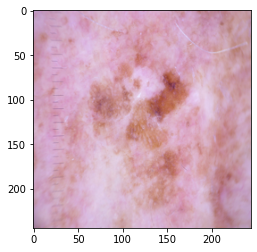

In [8]:
import matplotlib.pyplot as plt
plt.imshow(np.array(skin_df['image_resized'][0]))

In [8]:
y = skin_df['dx']

In [9]:
dict_target = {'bkl':0, 'nv':1, 'df':2, 'mel':3, 'vasc':4, 'bcc':5, 'akiec':6}

In [10]:
y_num = y.map(dict_target.get)

In [11]:
skin_df['target'] = y_num

In [12]:
skin_df

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,image_resized,target
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,../raw_data/HAM10000_all/ISIC_0027419.jpg,"[[[190, 153, 194], [192, 154, 196], [191, 153,...",0
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,../raw_data/HAM10000_all/ISIC_0025030.jpg,"[[[23, 13, 22], [24, 14, 24], [25, 14, 28], [3...",0
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,../raw_data/HAM10000_all/ISIC_0026769.jpg,"[[[185, 127, 137], [189, 133, 147], [194, 136,...",0
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,../raw_data/HAM10000_all/ISIC_0025661.jpg,"[[[24, 11, 17], [26, 13, 22], [38, 21, 32], [5...",0
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,../raw_data/HAM10000_all/ISIC_0031633.jpg,"[[[134, 90, 113], [147, 102, 125], [159, 115, ...",0
...,...,...,...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen,../raw_data/HAM10000_all/ISIC_0033084.jpg,"[[[155, 137, 148], [154, 136, 147], [151, 134,...",6
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen,../raw_data/HAM10000_all/ISIC_0033550.jpg,"[[[5, 6, 4], [6, 7, 4], [7, 8, 6], [7, 7, 5], ...",6
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen,../raw_data/HAM10000_all/ISIC_0033536.jpg,"[[[112, 102, 105], [127, 116, 117], [141, 127,...",6
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face,../raw_data/HAM10000_all/ISIC_0032854.jpg,"[[[158, 122, 146], [159, 122, 141], [154, 112,...",6


In [13]:
from tensorflow.keras.utils import to_categorical
y_cat = to_categorical(y_num, num_classes = 7)

In [14]:
y_cat.shape

(10015, 7)

In [15]:
X = skin_df['image_resized']

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.3, random_state=42)

In [17]:
X_train_stack = np.stack(X_train)

In [18]:
X_test_stack = np.stack(X_test)

In [19]:
X_train_stack.shape

(7010, 75, 100, 3)

## Basic CNN

In [20]:
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import Sequential, layers
from tensorflow.keras.layers import Reshape

#Basic CNN 1

model = Sequential()
model.add(layers.experimental.preprocessing.Rescaling(1. / 255))
model.add(layers.Conv2D(16, (3,3), input_shape=(75, 100, 3), padding='same', activation="relu"))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(32, (2,2), padding='same', activation="relu"))
model.add(layers.MaxPool2D(pool_size=(2,2))) 
model.add(layers.Flatten())
model.add(layers.Dense(50, activation='relu')) # intermediate layer
model.add(layers.Dense(7, activation='softmax'))

2022-06-01 21:45:43.992910: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [21]:
#Basic CNN 2

model = tf.keras.Sequential()
model.add(layers.experimental.preprocessing.Rescaling(1. / 255))
model.add(layers.Conv2D(32, 3, activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(32, 3, activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(32, 3, activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(7, activation='softmax'))

In [22]:
from tensorflow.keras.metrics import Recall, Precision

model.compile(
  optimizer = 'adam',
  loss = 'categorical_crossentropy', # "sparse_" allows to avoid one-hot-encoding the target
  metrics = ['accuracy','Recall', 'Precision'])

model.fit(
    X_train_stack,y_train,
    validation_split=0.2,
    epochs=30,
    batch_size = 32
)

2022-06-01 21:45:44.084971: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30
145/176 [=======================>......] - ETA: 1s - loss: 1.0520 - accuracy: 0.6709 - recall: 0.5700 - precision: 0.7419

KeyboardInterrupt: 

In [53]:
model.evaluate(X_test_stack, y_test)

94/94 [==============================] - 2s 21ms/step - loss: 1.3570 - accuracy: 0.7241 - recall: 0.7151 - precision: 0.7344


[1.357049584388733, 0.7241264581680298, 0.7151414155960083, 0.7344497442245483]

In [58]:
model.predict(X_test_stack)

array([[3.3746025e-01, 1.9302351e-03, 7.7906126e-09, ..., 4.6591720e-16,
        1.3730204e-07, 4.5018278e-05],
       [3.0556379e-03, 9.9681109e-01, 1.8211043e-06, ..., 6.3007294e-10,
        3.5023375e-05, 7.0854185e-08],
       [1.0596646e-08, 9.9997318e-01, 4.8037418e-07, ..., 3.9227820e-17,
        1.7994313e-06, 6.2027112e-09],
       ...,
       [2.7834318e-07, 9.9999976e-01, 3.0598388e-11, ..., 7.8944184e-19,
        7.4558225e-14, 8.1228522e-21],
       [2.5301739e-03, 1.5604333e-03, 1.5879741e-07, ..., 3.1696276e-13,
        2.5300844e-07, 2.0732163e-04],
       [1.2763754e-06, 7.4169135e-01, 6.0325490e-25, ..., 1.3927125e-19,
        2.7702550e-13, 5.2849765e-18]], dtype=float32)

In [59]:
model.predict_classes(X_test_stack)

array([3, 1, 1, ..., 1, 3, 1])

In [69]:
pd.DataFrame(y_test)

,0,1,2,3,4,5,6
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
3000,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3001,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3002,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3003,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [68]:
#plot history of validation and train metrics & Confusion matrix

## Data Augmentation

In [40]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True)  # randomly flip images

datagen.fit(X_train_stack)

In [41]:
#TODO: Split train set into train and val set

In [62]:
model = tf.keras.Sequential()
model.add(layers.experimental.preprocessing.Rescaling(1. / 255))
model.add(layers.Conv2D(32, 3, activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(32, 3, activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(32, 3, activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(7, activation='softmax'))

In [63]:
model.compile(
  optimizer = 'adam',
  loss = 'categorical_crossentropy', # "sparse_" allows to avoid one-hot-encoding the target
  metrics = ['accuracy','Recall', 'Precision'])

epochs = 30
batch_size = 32
model.fit_generator(datagen.flow(X_train_stack,y_train, batch_size=batch_size),
                              epochs = epochs,
                              verbose = 1)

Epoch 1/30
220/220 [==============================] - 14s 61ms/step - loss: 1.0450 - accuracy: 0.6686 - recall: 0.5608 - precision: 0.7525
Epoch 2/30
220/220 [==============================] - 14s 63ms/step - loss: 0.9071 - accuracy: 0.6749 - recall: 0.5696 - precision: 0.8096
Epoch 3/30
220/220 [==============================] - 15s 66ms/step - loss: 0.8861 - accuracy: 0.6877 - recall: 0.5745 - precision: 0.8137
Epoch 4/30
220/220 [==============================] - 15s 67ms/step - loss: 0.8417 - accuracy: 0.6944 - recall: 0.5842 - precision: 0.8236
Epoch 5/30
220/220 [==============================] - 19s 84ms/step - loss: 0.7962 - accuracy: 0.7029 - recall: 0.6036 - precision: 0.8189
Epoch 6/30
220/220 [==============================] - 18s 83ms/step - loss: 0.7802 - accuracy: 0.7114 - recall: 0.6126 - precision: 0.8253
Epoch 7/30
220/220 [==============================] - 17s 78ms/step - loss: 0.7589 - accuracy: 0.7207 - recall: 0.6274 - precision: 0.8202
Epoch 8/30
220/220 [=======

In [64]:
model.evaluate(X_test_stack, y_test)

94/94 [==============================] - 2s 21ms/step - loss: 0.6693 - accuracy: 0.7627 - recall: 0.7078 - precision: 0.8197


[0.6693451404571533,
 0.7627288103103638,
 0.7078202962875366,
 0.8196531534194946]

In [65]:
model.predict_classes(X_test_stack)

array([3, 1, 6, ..., 1, 3, 1])

In [67]:
pd.DataFrame(y_test)

,0,1,2,3,4,5,6
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
3000,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3001,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3002,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3003,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
#plot history of validation and train metrics & Confusion matrix 

## Baseline Model

In [22]:
skin_df

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,image_resized,target
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,../raw_data/HAM10000_all/ISIC_0027419.jpg,"[[[190, 153, 194], [192, 154, 196], [191, 153,...",0
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,../raw_data/HAM10000_all/ISIC_0025030.jpg,"[[[23, 13, 22], [24, 14, 24], [25, 14, 28], [3...",0
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,../raw_data/HAM10000_all/ISIC_0026769.jpg,"[[[185, 127, 137], [189, 133, 147], [194, 136,...",0
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,../raw_data/HAM10000_all/ISIC_0025661.jpg,"[[[24, 11, 17], [26, 13, 22], [38, 21, 32], [5...",0
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,../raw_data/HAM10000_all/ISIC_0031633.jpg,"[[[134, 90, 113], [147, 102, 125], [159, 115, ...",0
...,...,...,...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen,../raw_data/HAM10000_all/ISIC_0033084.jpg,"[[[155, 137, 148], [154, 136, 147], [151, 134,...",6
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen,../raw_data/HAM10000_all/ISIC_0033550.jpg,"[[[5, 6, 4], [6, 7, 4], [7, 8, 6], [7, 7, 5], ...",6
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen,../raw_data/HAM10000_all/ISIC_0033536.jpg,"[[[112, 102, 105], [127, 116, 117], [141, 127,...",6
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face,../raw_data/HAM10000_all/ISIC_0032854.jpg,"[[[158, 122, 146], [159, 122, 141], [154, 112,...",6


In [73]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score, precision_score

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
y_pred = dummy_clf.predict(X_test)
accuracy = dummy_clf.score(X_test, y_test)
#use F1 instead of recall -> more categories not binary
recall = recall_score(y_test, y_pred, average = 'weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')

/Users/elenaschubert/.pyenv/versions/3.8.13/envs/lewagon/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [74]:
accuracy

0.664559068219634

In [75]:
recall

0.664559068219634

In [76]:
f1

0.5306375286823706

In [77]:
precision

0.4416387551529481